In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from sklearn.datasets import make_blobs
import time
import scipy.stats as stats
from random import choice, shuffle
from string import ascii_lowercase, digits
from datetime import datetime
import random
import timeit

from scipy.stats import beta
from scipy.stats import betabinom, binom

In [2]:
# Set Parameters
n_samples = 100000
num_bins = 20
length_strings = 3
p=0.5
n_binomial = 100
n_discrete = 10
lambda_param = 4

In [3]:
def plot_distribution(dist, n_samples, title, num_bins):
    weights = np.ones_like(dist)/float(len(dist))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    fig.suptitle(title,fontsize=20)
    count, bins, ignored = ax1.hist(dist, num_bins, weights=weights)
    #ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
    ax1.set_title('Probability Distribution',fontsize=18)
    ax1.set_ylabel('Frequency',fontsize=16)
    ax1.set_xlabel('Value',fontsize=16)
    plt.setp(ax1.get_yticklabels(), fontsize=14)
    plt.setp(ax1.get_xticklabels(), fontsize=14)
    y = np.arange(0,n_samples)
    ax2.scatter(y,dist,s=10)
    ax2.set_title('Sample Values',fontsize=18)
    ax2.set_ylabel('Sample Value',fontsize=16)
    ax2.set_xlabel('Sample Number',fontsize=16)
    plt.setp(ax2.get_xticklabels(), fontsize=14)
    plt.setp(ax2.get_yticklabels(), fontsize=14)

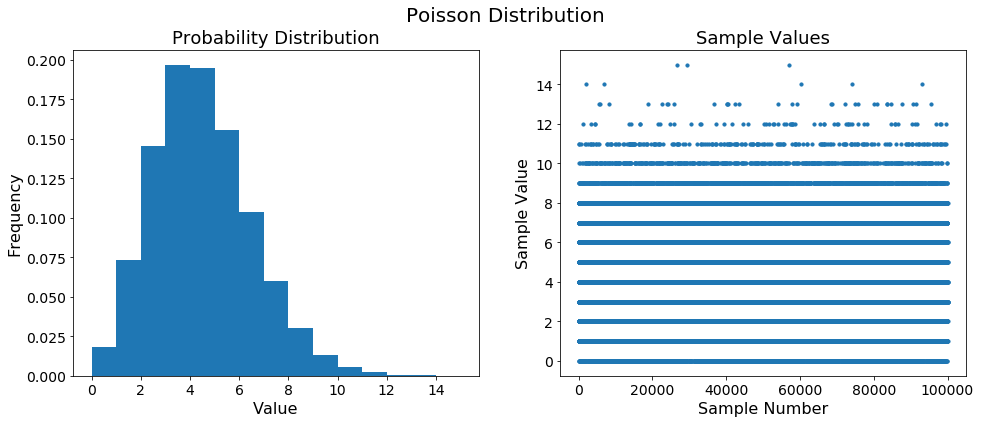

In [4]:
def poission_distribution(n_samples=n_samples, lambda_param=lambda_param, display = True):
    poission =  np.random.poisson(lambda_param, n_samples)
    if display==True:
        plot_distribution(poission, n_samples, "Poisson Distribution",15)
    return poission
poission = poission_distribution()

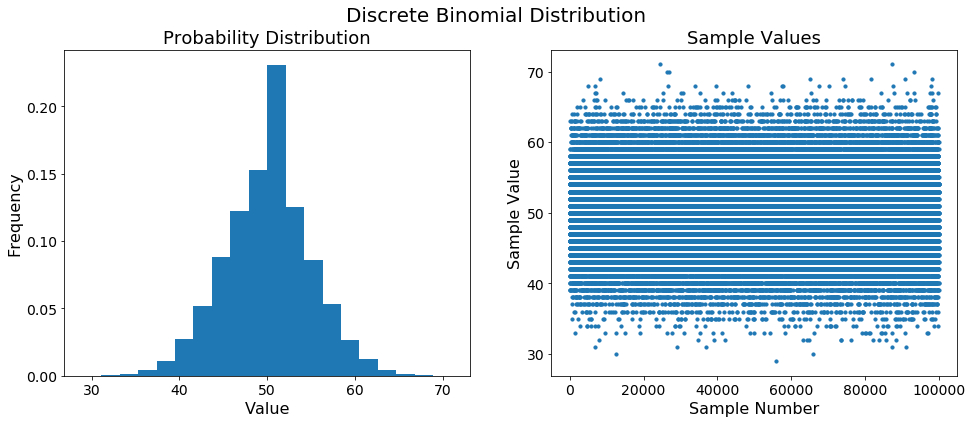

In [5]:
def discrete_binomial_distribution(n_samples=n_samples, p=p, n=n_binomial, display = True):
    discrete_binomial_distribution = binom.rvs(n, p, size=n_samples)
    if display==True:
        plot_distribution(discrete_binomial_distribution, n_samples, "Discrete Binomial Distribution", num_bins)
        
    return discrete_binomial_distribution
discrete_binomial = discrete_binomial_distribution()

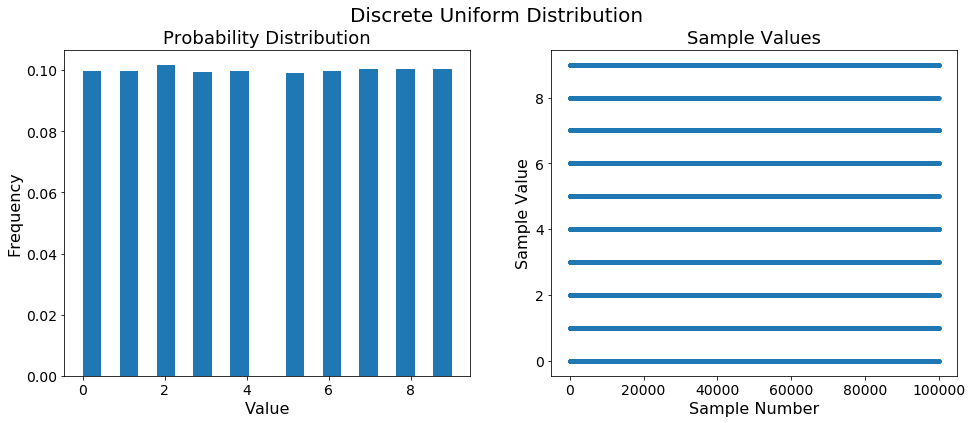

In [6]:
def discrete_uniform_distribution(n_samples=n_samples, n=n_discrete, display = True):
    discrete_uniform_distribution = np.random.randint(n, size=n_samples)
    
    if display == True:
        plot_distribution(discrete_uniform_distribution, n_samples, "Discrete Uniform Distribution", num_bins)
        
    return discrete_uniform_distribution
discrete_uniform = discrete_uniform_distribution()

In [7]:
def create_dates(n_samples=n_samples):
    sample_dates = pd.date_range(end = datetime.today(), periods = n_samples).to_pydatetime().tolist()
    shuffle(sample_dates)
    return sample_dates

In [8]:
def create_strings(n_samples=n_samples, length_strings=length_strings):
    chars = ascii_lowercase + digits
    sample_strings = [''.join(choice(chars) for _ in range(length_strings)) for _ in range(n_samples)]
    #print(lst)
    return sample_strings

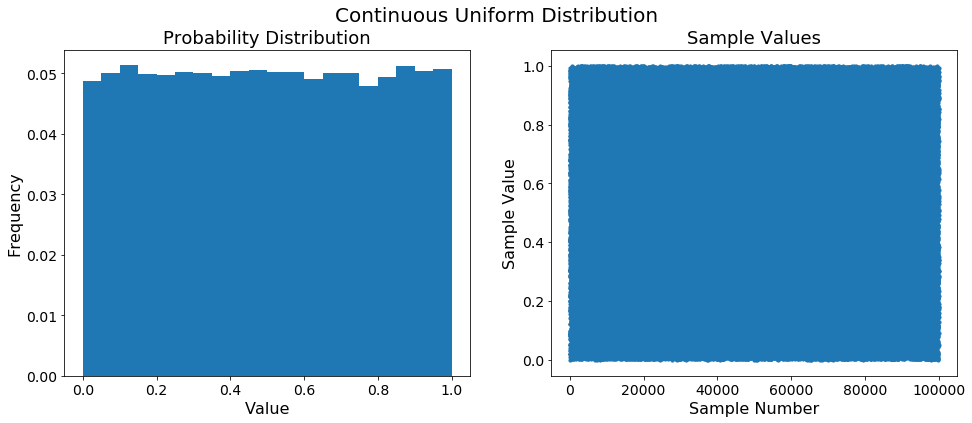

In [9]:
# Create uniform distribution
def uniform_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    sample_uniform = (np.random.uniform(low,high,n_samples))
    if display==True:
        plot_distribution(sample_uniform, n_samples, "Continuous Uniform Distribution", num_bins)
    return sample_uniform

sample_uniform=uniform_distribution()

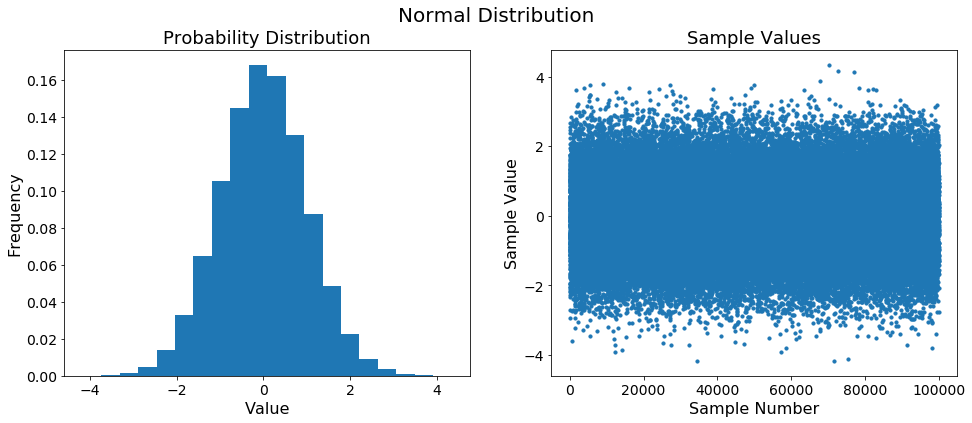

In [10]:
def normal_distribution(n_samples=n_samples, num_bins=num_bins, display = True, mu=0., sigma=1.):
    # Normal distribution
    sample_normal = np.random.normal(mu, sigma, n_samples)
    if display == True:
        plot_distribution(sample_normal, n_samples, "Normal Distribution", num_bins)
    return sample_normal

sample_normal = normal_distribution()

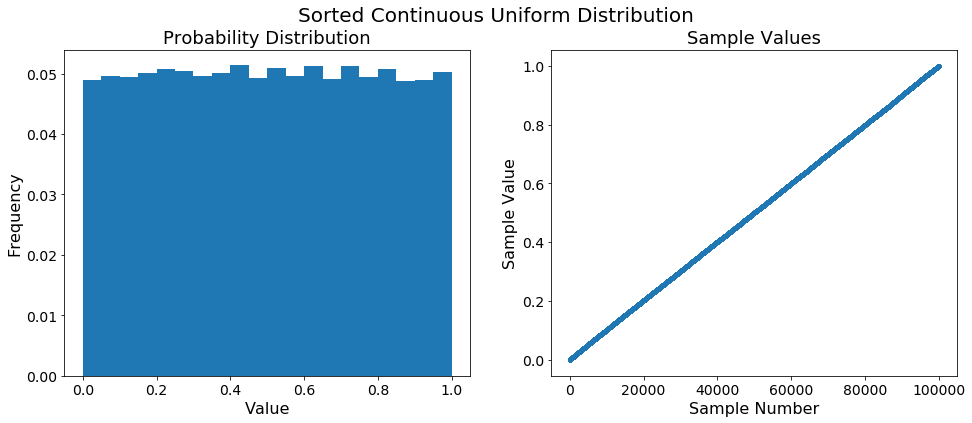

In [11]:
def uniform_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    #Sorted Uniform distribution
    sample_uniform_sorted = np.sort(np.random.uniform(low,high,n_samples))
    if display == True:
        plot_distribution(sample_uniform_sorted, n_samples, "Sorted Continuous Uniform Distribution", num_bins)
    return sample_uniform_sorted
sample_uniform_sorted = uniform_sorted_distribution()

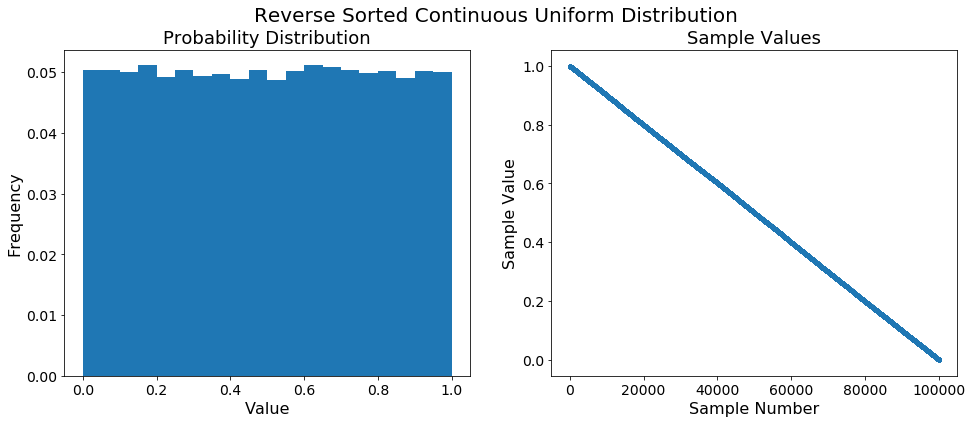

In [12]:
def uniform_reverse_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    # Reverse Sorted Uniform distribution
    sample_uniform_reverse_sorted = np.sort(np.random.uniform(low,high,n_samples))[::-1]
    if display == True:
        plot_distribution(sample_uniform_reverse_sorted, n_samples, "Reverse Sorted Continuous Uniform Distribution", num_bins)
    return sample_uniform_reverse_sorted
sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution()

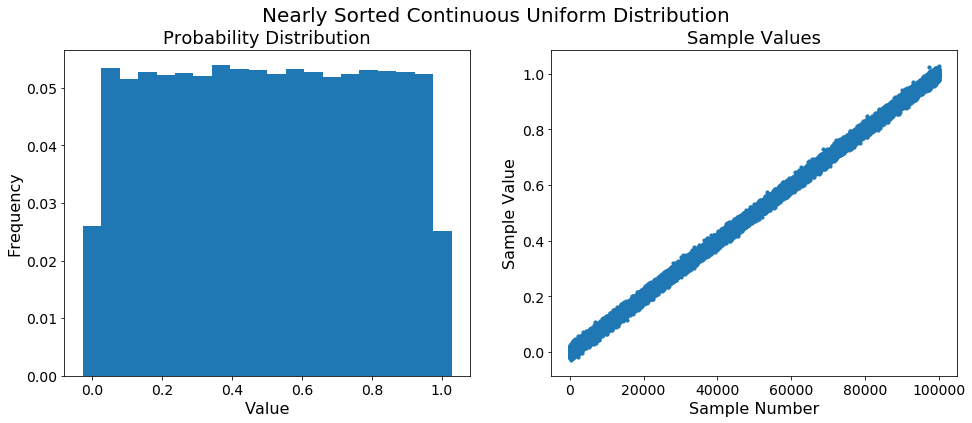

In [13]:
def uniform_nearly_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1., mean_noise= 0., std_noice = 0.01):
    # Nearly Uniform distribution
    sample_uniform_nearly_sorted = np.sort(np.random.uniform(low,high,n_samples))
    noise = np.random.normal(mean_noise,std_noice,n_samples)
    sample_uniform_nearly_sorted = sample_uniform_nearly_sorted + noise
    if display==True:
        plot_distribution(sample_uniform_nearly_sorted, n_samples, "Nearly Sorted Continuous Uniform Distribution", num_bins)
    return sample_uniform_nearly_sorted
sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution()

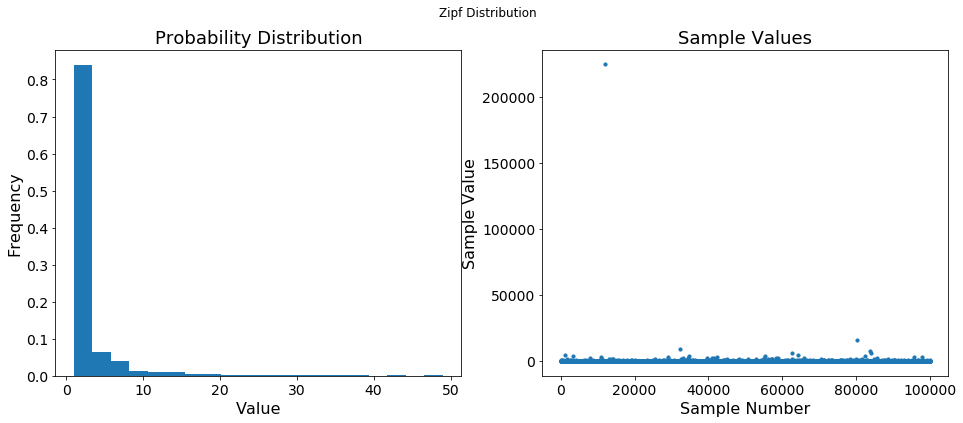

In [14]:
def zipf_distribution(n_samples=n_samples, num_bins=num_bins, display = True, a=2.):
    # ZipF Distribution
    sample_zipf = np.random.zipf(a, n_samples)
    if display==True:
        # Plot
        
        weights = np.ones_like(sample_zipf[sample_zipf<50])/float(len(sample_zipf[sample_zipf<50]))
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
        fig.suptitle('Zipf Distribution')
        count, bins, ignored = ax1.hist(sample_zipf[sample_zipf<50], 20, weights=weights)
        #ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax1.set_title('Probability Distribution',fontsize=18)
        ax1.set_ylabel('Frequency',fontsize=16)
        ax1.set_xlabel('Value',fontsize=16)
        plt.setp(ax1.get_yticklabels(), fontsize=14)
        plt.setp(ax1.get_xticklabels(), fontsize=14)
        y = np.arange(0,n_samples)
        ax2.scatter(y,sample_zipf,s=10)
        ax2.set_title('Sample Values',fontsize=18)
        ax2.set_ylabel('Sample Value',fontsize=16)
        ax2.set_xlabel('Sample Number',fontsize=16)
        plt.setp(ax2.get_xticklabels(), fontsize=14)
        plt.setp(ax2.get_yticklabels(), fontsize=14)

    return sample_zipf
sample_zipf = zipf_distribution()

In [15]:
def create_df_distribution(n_samples=n_samples, dist_type="Uniform"):
    df_distribion = pd.DataFrame().astype(np.float64)
    if dist_type == "Uniform":
        sample_uniform= uniform_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform"] = sample_uniform
    if dist_type == "Normal":
        sample_normal = normal_distribution(display=False, n_samples=n_samples)
        df_distribion["Normal"] = sample_normal
    if dist_type == "Uniform_Sorted":
        sample_uniform_sorted = uniform_sorted_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform_Sorted"] = sample_uniform_sorted
    if dist_type == "Uniform_Reverse_Sorted":
        sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform_Reverse_Sorted"] = sample_uniform_reverse_sorted
    if dist_type == "Uniform_Nearly_Sorted":
        sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution(display=False, n_samples=n_samples)
        df_distribion["Uniform_Nearly_Sorted"] = sample_uniform_nearly_sorted
    if dist_type == "Zipf":
        sample_zipf = zipf_distribution(display=False, n_samples=n_samples)
        df_distribion["Zipf"] = sample_zipf
    if dist_type == "Dates":
        sample_dates = create_dates(n_samples=n_samples)
        df_distribion["Dates"] = sample_dates
    if dist_type == "Strings":
        sample_strings = create_strings(n_samples=n_samples)
        df_distribion["Strings"] = sample_strings
    if dist_type == "Discrete_Uniform":
        sample_discrete = discrete_uniform_distribution(n_samples=n_samples, n=n_discrete, display=False)
        df_distribion["Discrete_Uniform"] = sample_discrete
    if dist_type == "Discrete_Binomial":
        sample_bionmial = discrete_binomial_distribution(n_samples=n_samples, p=p, n=n_binomial, display=False)
        df_distribion["Discrete_Binomial"] = sample_bionmial
    if dist_type == "Poisson":
        poisson =  poission_distribution(n_samples=n_samples, lambda_param=lambda_param, display = False)
        df_distribion["Poisson"] = poisson
              
    return df_distribion

In [16]:
def quick_sort(df, columns):
    sorted_df = df.sort_values(columns, kind="quicksort")
    return sorted_df
def merge_sort(df, columns):
    sorted_df = df.sort_values(columns, kind="mergesort")
    return sorted_df
def heap_sort(df, columns):
    sorted_df = df.sort_values(columns, kind="heapsort")
    return sorted_df

choices = [quick_sort,merge_sort,heap_sort]
choices_names = ["quicksort","mergesort","heapsort"]

In [17]:
def evaluate_sorts(distribution_type="Uniform", second_col = None, repetitions=200):
    if second_col == None:
        measures = pd.DataFrame().astype(np.float64)
        for i, sorting_algorithm in enumerate(choices):
            algorithm_times = []
            for n in range(repetitions):
                distribion = create_df_distribution(n_samples=n_samples, dist_type=distribution_type)
                start_time = time.perf_counter()
                #sorted_df = distribion.sort_values([distribution_type],kind=sorting_algorithm)
                sorted_df = sorting_algorithm(distribion, [distribution_type])
                exeuction_time = (time.perf_counter() - start_time)
                print(exeuction_time)
                algorithm_times.append(exeuction_time)
            measures[choices_names[i]] = algorithm_times
            print("The time of",choices_names[i], "is", np.mean(algorithm_times))
            print("It has a STD of", np.std(algorithm_times))
    else:
        measures = pd.DataFrame().astype(np.float64)
        for i, sorting_algorithm in enumerate(choices):
            algorithm_times = []
            for n in range(int(repetitions/2)):
                distribion_1 = create_df_distribution(n_samples=n_samples, dist_type=distribution_type)
                distribion_2 = create_df_distribution(n_samples=n_samples, dist_type=second_col)
                df_distribions = pd.concat([distribion_1, distribion_2], axis=1)
                #print(df_distribions)
                start_time = time.perf_counter()
                #sorted_df = df_distribions.sort_values([distribution_type, second_col],kind=sorting_algorithm)
                sorted_df = sorting_algorithm(df_distribions, [distribution_type, second_col])
                exeuction_time = (time.perf_counter() - start_time)
                algorithm_times.append(exeuction_time)
            measures[choices_names[i]] = algorithm_times
            print("The time of",choices_names[i], "is", np.mean(algorithm_times))
            print("It has a STD of", np.std(algorithm_times))
    return measures

In [18]:
print("Discrete_Uniform")
df_discrete_uniform = evaluate_sorts(distribution_type="Discrete_Uniform")
df_discrete_uniform.to_csv("DATA/df_discrete_uniform_100000.csv")

Discrete_Uniform
0.006675600000001225
0.005218700000000354
0.005309300000000405
0.005392099999994571
0.006727500000003772
0.005226000000000397
0.005510900000004426
0.005318600000002505
0.005536399999996888
0.00562670000000054
0.004943799999999499
0.004998000000000502
0.005169899999998506
0.008389199999996322
0.007731399999997279
0.005089800000000366
0.005445500000000436
0.005432000000006099
0.005316800000002786
0.005273400000000095
0.005092400000002328
0.004967100000001778
0.004886499999997795
0.0050333000000009065
0.005281199999998876
0.005238400000003196
0.005173100000000375
0.00561880000000059
0.005289100000005931
0.005376600000005283
0.005797700000002237
0.0049495000000021605
0.005320300000001055
0.005259500000001083
0.005149699999996926
0.005462799999996548
0.004979499999997472
0.005373900000002152
0.005743600000002402
0.005775499999998601
0.00532540000000381
0.005064399999994862
0.007075700000001461
0.005188999999994337
0.005829800000000773
0.004966299999999535
0.0050572999999971

0.010158799999999246
0.009626500000003091
0.009993100000002642
0.009742700000003879
0.009320999999999913
0.010367500000000973
0.009792700000005539
0.009550500000003126
0.009760300000010602
0.009855700000002798
0.00967210000000307
0.010119100000011372
0.009574799999995776
The time of mergesort is 0.009985455500000242
It has a STD of 0.0011672476711774961
0.00855300000000625
0.009041300000006913
0.008898500000000809
0.0100843000000026
0.009614299999995524
0.009473399999990306
0.008922400000002995
0.009373500000009471
0.008986600000000067
0.009349700000001349
0.00963649999999916
0.00937260000000606
0.008800699999994777
0.009262599999999566
0.009034499999998502
0.009173699999990959
0.010043599999988828
0.010155400000002146
0.00900619999998753
0.00936699999999746
0.009423599999990984
0.00909009999999455
0.009758500000003778
0.009182600000002594
0.008728399999995418
0.009395299999994222
0.009264200000004053
0.009047600000002376
0.011048999999999864
0.008980399999998667
0.008793699999998239
0

In [19]:
print("Discrete_Binomial")
df_discrete_binomial = evaluate_sorts(distribution_type="Discrete_Binomial")
df_discrete_binomial.to_csv("DATA/df_discrete_binomial_100000.csv")

Discrete_Binomial
0.005741099999994503
0.006462499999997817
0.005717300000000591
0.005782400000001076
0.005504999999999427
0.005809200000001624
0.0054543999999907555
0.005658600000003844
0.006925600000002419
0.0060100000000034015
0.005599999999986949
0.006468400000002816
0.006088699999992286
0.0061924000000033175
0.005834199999995349
0.005399900000000457
0.006789900000001126
0.005518699999996102
0.0057577000000037515
0.005409999999997694
0.005662399999991408
0.0054019000000096185
0.005759600000004639
0.005382900000000745
0.006011799999996015
0.005977999999998929
0.005717199999992317
0.005435500000004367
0.0055827000000050475
0.0054381000000063295
0.005578400000004535
0.005415400000003956
0.005631199999996284
0.005941799999988007
0.005575899999996636
0.005512600000002976
0.005870700000002671
0.005466400000003091
0.005695700000003967
0.0054963999999984026
0.005696899999989569
0.006789900000001126
0.006139199999992684
0.005456600000002254
0.006540899999990302
0.00561159999999461
0.0055497

0.01034649999999715
0.01049059999999713
0.010550999999992428
0.010350500000001261
0.010740500000011366
0.010724100000004455
0.010954300000008743
The time of mergesort is 0.010784093499999514
It has a STD of 0.0007979591928845392
0.010725899999997068
0.010811099999997964
0.010476100000005317
0.010047099999994202
0.010224499999992531
0.010536799999997015
0.01111610000000951
0.010394899999994323
0.010681600000012281
0.01051999999999964
0.010941399999992996
0.010069999999998913
0.010247399999997242
0.010994400000001292
0.012619299999997224
0.010749000000004116
0.010563300000001163
0.009989000000004467
0.010611499999996
0.010177399999989234
0.010281599999999003
0.010656299999993735
0.010961800000004018
0.010139800000004584
0.010635999999990986
0.010296699999997827
0.00999389999999778
0.010942499999998745
0.010635399999998185
0.010001299999998992
0.010150000000010095
0.010125799999997298
0.010139199999997572
0.010040099999997665
0.010351400000004674
0.010299700000004464
0.010100199999996562


In [20]:
print("Poisson")
df_poisson= evaluate_sorts(distribution_type="Poisson")
df_poisson.to_csv("DATA/df_poisson_100000.csv")

Poisson
0.00548220000000299
0.005278399999994576
0.005567300000009823
0.005078099999991537
0.004790100000008124
0.0055694999999929
0.00575739999999314
0.0050640999999984615
0.00821399999999528
0.005903299999999945
0.006625099999993722
0.005501799999990453
0.0049212000000125045
0.005237100000002215
0.006410399999992933
0.006079899999988925
0.006998099999989904
0.005260299999989115
0.006982399999998279
0.005173499999997944
0.005159800000001269
0.006284400000012624
0.004923099999999181
0.0049695999999954665
0.005698800000004667
0.005105499999999097
0.004819299999994087
0.004931499999997868
0.005291899999988914
0.005268900000004351
0.004921999999993432
0.006326999999998861
0.0054296999999934314
0.005931300000000306
0.00683240000000751
0.005122600000007083
0.0055784999999985985
0.005912699999996107
0.005670299999991357
0.005392099999994571
0.004933499999992819
0.00503439999999955
0.005354699999998047
0.005111499999998159
0.005049499999998375
0.005213400000002366
0.005593199999992748
0.00681

0.013104800000007799
0.010611499999996
0.010035299999998415
0.01001650000000609
0.009906200000003196
0.00978539999999839
0.009651800000000321
The time of mergesort is 0.01039673000000029
It has a STD of 0.0012839262662236303
0.008345200000007935
0.008718999999999255
0.008914599999997108
0.009071800000000962
0.008454300000011017
0.008655500000003258
0.008455900000001293
0.008524100000002477
0.008472900000001005
0.009752400000010653
0.009225000000000705
0.009258899999991854
0.009309399999992252
0.008775499999998715
0.00892000000000337
0.009061900000006062
0.008740000000003079
0.008866699999998673
0.009130299999995373
0.008859200000003398
0.009402100000002633
0.00902539999999874
0.008885500000005209
0.008777100000003202
0.008894200000000296
0.008905100000006883
0.009071800000000962
0.008647599999989097
0.008763600000008864
0.009362999999993349
0.008986600000000067
0.00996479999999167
0.008884099999988848
0.008982799999998292
0.008655200000006857
0.008434399999998732
0.008871099999993248
0

In [29]:
print("Dates")
df_dates = evaluate_sorts(distribution_type="Dates")
df_dates.to_csv("DATA/df_dates_100000.csv")

Dates
0.017360999999993965
0.013236100000028728
0.0173930999999925
0.014422400000000835
0.013660700000002635
0.0155566000000249
0.013859700000011799
0.016601299999990715
0.01284010000000535
0.016025200000001405
0.013634300000035182
0.016153999999971802
0.015029999999967458
0.01592929999998205
0.012807899999984329
0.01524589999996806
0.015726200000017343
0.016397899999958554
0.015938500000004296
0.01456049999995912
0.016357700000014574
0.017698300000006384
0.014513600000043425
0.01672800000000052
0.016106200000024273
0.013244699999972909
0.014009999999984757
0.014427000000011958
0.01513479999999845
0.016357999999968342
0.015040300000009665
0.01619420000002947
0.016868499999986852
0.01744020000001001
0.013651799999990999
0.013211699999999382
0.016110200000014174
0.017979500000024018
0.017796599999996943
0.014888499999983651
0.015448800000001484
0.015514600000017253
0.019811600000025464
0.01677460000001929
0.014309099999991304
0.018903800000032334
0.017001899999968373
0.017444000000011783

0.014356500000076267
0.017175300000076277
0.014947699999993347
0.01465579999990041
0.0154006999999865
0.016698600000040642
0.01634549999994306
0.015551999999956934
0.015627900000026784
0.014114599999970778
The time of mergesort is 0.015617414499997153
It has a STD of 0.0017195989693940957
0.02393240000003516
0.02531300000009651
0.022274100000004182
0.023279900000034104
0.024201299999958792
0.023563499999909254
0.022388800000044284
0.025525500000071588
0.023871400000075482
0.024675899999920148
0.02234329999998863
0.02441380000004756
0.025000200000022232
0.02172900000005029
0.02380470000002788
0.023224099999993086
0.024511800000027506
0.02507900000000518
0.022406200000091303
0.02492589999997108
0.022316000000046188
0.02494689999991806
0.024563400000033653
0.023136399999998503
0.0238805000000184
0.023304599999960374
0.02395909999995638
0.024975299999937306
0.023974000000066553
0.02454130000000987
0.023809900000060225
0.024600499999905878
0.025042800000051102
0.02369419999990896
0.02239640

In [30]:
print("Strings")
df_strings = evaluate_sorts(distribution_type="Strings")
df_strings.to_csv("DATA/df_strings_100000.csv")

Strings
0.11817459999997482
0.11815960000001269
0.123409899999956
0.11392079999995985
0.11596179999992273
0.11404349999997976
0.12101319999999305
0.12478390000001127
0.12846399999989444
0.11659180000003744
0.1191223999999238
0.11449310000000423
0.11733989999993355
0.12236760000007507
0.12845649999997022
0.11834050000004481
0.11797090000004573
0.11533520000000408
0.1278368999999202
0.11627609999993638
0.12656989999993584
0.11891460000003917
0.11642039999992448
0.12365939999995135
0.1273926000000074
0.12252360000002227
0.11709140000004936
0.1183786000000282
0.12302629999999226
0.12610849999998663
0.11753279999993538
0.12232519999997749
0.12545009999996637
0.11517600000001949
0.11631309999995665
0.12280969999994795
0.11821550000001935
0.11759470000004058
0.11704499999996187
0.11725090000004457
0.1179875999999922
0.11784039999997731
0.11777359999996406
0.11727439999992839
0.11984749999999167
0.11705719999997655
0.12002330000007078
0.1160363999999845
0.11675349999995888
0.11640169999998307


0.20714429999998174
0.22097770000004857
0.2041910000000371
0.20631279999997787
0.20595730000002277
0.20553719999998066
0.2060963000000129
0.2193298000000823
0.2049193999999943
0.218210699999986
0.2173682000000099
0.20487020000007305
0.20531629999993584
0.20583330000010847
0.21301180000000386
0.20725470000002133
0.20550149999996847
0.218601700000022
0.2121450999999297
0.2222497000000203
0.22711580000009235
0.22083679999991546
0.2254549000000452
0.21764380000001893
0.21755339999992884
0.22240520000002562
0.24030870000001414
0.22982309999997597
0.24300940000000537
0.2218119999999999
0.2230806999999686
0.22098019999998542
0.23465879999992012
0.2228960999999572
0.22080500000004122
0.21958619999998064
0.2253044999999929
0.2195944000000054
0.21951070000000072
0.221942399999989
0.2180614000000105
0.21729329999993752
0.21911560000000918
0.2189922000000024
0.2062541999999894
0.2193285000000742
0.2072693000000072
0.20451630000002297
0.20458059999998568
0.2190663000000086
0.205676799999992
0.20779

In [31]:
print("Uniform")
df_uniform = evaluate_sorts(distribution_type="Uniform")
df_uniform.to_csv("DATA/df_uniform_100000.csv")

Uniform
0.013551499999948646
0.012197700000001532
0.01207929999998214
0.01164939999989656
0.011428799999976036
0.012344099999950231
0.012051799999994728
0.01183349999996608
0.01401069999997162
0.01594779999993534
0.012148199999955978
0.011803200000031211
0.012150899999937792
0.011514300000044386
0.012582599999973354
0.011479899999926602
0.012262799999916751
0.01231889999996838
0.01343480000002728
0.01329380000004221
0.012349999999969441
0.012300900000013826
0.011979900000028465
0.011824999999930697
0.011728700000048775
0.011671900000010282
0.011741699999902266
0.011883300000022246
0.012817700000027799
0.01287569999999505
0.011578999999983353
0.012243999999896005
0.01231560000007903
0.012024400000086644
0.012062499999956344
0.011799699999983204
0.012204600000018218
0.011904500000014195
0.012772600000062084
0.012023400000089168
0.011694800000100258
0.011712099999954262
0.011889300000007097
0.011505000000056498
0.012589100000013786
0.013575199999991128
0.015918700000042918
0.0125558000000

0.014104800000040996
0.01395100000002003
0.013745200000016666
0.013466099999959624
0.013502200000061748
0.01324940000006336
0.013622899999973015
0.013290299999994204
0.013241200000038589
0.013333600000009938
The time of mergesort is 0.01350971150000305
It has a STD of 0.00043245385594116567
0.020728100000042105
0.020583400000077745
0.020612000000028274
0.020169099999975515
0.021405400000048758
0.020204500000090775
0.02168810000000576
0.02124160000005304
0.020888600000034785
0.02061249999997017
0.020522700000014993
0.021111300000029587
0.020606200000088393
0.02046219999999721
0.02093549999995048
0.020706199999949604
0.02039609999997083
0.02052549999996245
0.020291099999894868
0.021276899999975285
0.020190800000023046
0.021690499999976964
0.021056799999996656
0.02069410000001426
0.02065349999998034
0.02036909999992531
0.020792400000004818
0.020548300000086783
0.020391499999959706
0.020886399999994865
0.020732199999997647
0.02034009999999853
0.02054099999998016
0.020144299999969917
0.0212

In [32]:
print("Normal")
df_normal = evaluate_sorts(distribution_type="Normal")
df_normal.to_csv("DATA/df_normal_100000.csv")

Normal
0.013650699999971039
0.011722599999984595
0.011925700000006145
0.01157710000006773
0.012109399999985726
0.011537599999996928
0.011601200000086465
0.011657000000013795
0.015281400000048961
0.01223970000000918
0.011606900000060705
0.01144499999998061
0.011564600000042446
0.011928099999977348
0.011527600000022176
0.011404200000015408
0.012094600000068567
0.011404200000015408
0.013104399999974703
0.011910099999909107
0.011422199999969962
0.011855299999979252
0.011483600000019578
0.011890800000060153
0.011618499999940468
0.01136060000010275
0.011956400000030953
0.011485899999911453
0.012256699999966258
0.011966799999981959
0.011912800000004609
0.01203710000004321
0.01198090000002594
0.012168099999939841
0.01219709999998031
0.011967599999934464
0.0119328000000678
0.01338379999992867
0.012015599999926962
0.011800399999970068
0.01188579999995909
0.011507900000083282
0.014313199999946846
0.011643199999980425
0.012280899999950634
0.01241200000004028
0.012203699999986384
0.0136741999999685

0.014217899999948713
0.013718000000039865
0.01381149999997433
0.013607600000000275
0.01327600000001894
0.013376999999991313
0.013134199999967677
0.013143300000024283
0.013182900000060727
The time of mergesort is 0.013431767000002991
It has a STD of 0.0003263278382427853
0.021064499999965847
0.020279599999980746
0.02135920000000624
0.02021690000003673
0.02097270000001572
0.020864399999936722
0.020614300000033836
0.0209320999999818
0.020548299999973096
0.02078910000000178
0.020512599999960912
0.02034639999999399
0.020394799999962743
0.020347399999991467
0.021004199999993034
0.020511399999918467
0.020174600000018472
0.021276800000009644
0.02023010000004888
0.020946699999967677
0.022400100000027123
0.021623700000077406
0.02060699999992721
0.020617199999946934
0.020861299999978655
0.020515500000101383
0.020386400000006688
0.020884600000044884
0.02037069999994401
0.02040569999996933
0.02049669999996695
0.020144800000025498
0.021374100000002727
0.020171600000026046
0.021649999999908687
0.0209

In [34]:
print("Uniform_Sorted")
df_uniform_sorted = evaluate_sorts(distribution_type="Uniform_Sorted")
df_uniform_sorted.to_csv("DATA/df_uniform_sorted_100000.csv")

Uniform_Sorted
0.00495259999991049
0.003604999999993197
0.004130499999973836
0.003757899999982328
0.003942299999948773
0.003998900000055983
0.0035007999999834283
0.0031265000000075815
0.0037717000000156986
0.005260399999997389
0.0047215999999252745
0.003582999999935055
0.003222100000016326
0.0032737000000224725
0.0068827000000055705
0.003271900000072492
0.003171400000042013
0.0034722999999985404
0.004991399999994428
0.003213899999991554
0.0035060000000157743
0.003164599999990969
0.0031811999999717955
0.0035020000000258733
0.0039300000000821456
0.003221899999971356
0.003549799999973402
0.0032161000000314743
0.003190099999983431
0.0041253000000551765
0.0032506000000012136
0.00322829999993246
0.003468699999984892
0.003158199999916178
0.003791599999999562
0.003547000000025946
0.003247400000077505
0.003134599999953025
0.0034626000000343993
0.0031749999999419742
0.003922999999986132
0.003541299999938019
0.0032314999999698557
0.0031443999999964944
0.005538499999943269
0.005159400000025016
0.0

0.0029678999999305233
0.002268399999934445
0.0022159000000101514
0.002525500000047032
0.0022619000000076994
0.0023151999999981854
0.0025464000000283704
0.0021948999999494845
0.0022496999999930267
0.0025398000000222964
0.0022233999999343723
0.0022160999999414344
0.0026710000000775835
0.0023128999999926236
0.002197400000000016
0.0029120000000375512
0.00228489999994963
0.002248799999961193
0.0025385999999798514
0.002228999999942971
0.0022042000000510598
0.0025354000000561427
0.002214200000025812
The time of mergesort is 0.0023787714999997434
It has a STD of 0.00018552268362213948
0.009475500000007742
0.009495399999991605
0.009653800000023693
0.009363799999960065
0.009473899999989044
0.009028599999965081
0.009072199999991426
0.009414600000013706
0.009054300000002513
0.009917000000086773
0.009872400000062953
0.009132399999998597
0.009173400000008769
0.009409699999991972
0.0091251999999713
0.009040799999979754
0.009417800000051102
0.009068200000001525
0.009479700000042612
0.00949930000001586

In [52]:
print("Uniform_Reverse_Sorted")
df_uniform_reverse_sorted = evaluate_sorts(distribution_type="Uniform_Reverse_Sorted")
df_uniform_reverse_sorted.to_csv("DATA/df_uniform_reverse_sorted_100000.csv")

Uniform_Reverse_Sorted
0.005611799999996947
0.004662900000084846
0.003912899999932051
0.004538000000138709
0.003934699999945224
0.0038064999998823623
0.0044020000000273285
0.0041608999999880325
0.0064403999999740336
0.004445000000032451
0.003990200000089317
0.0038392000001294946
0.004487700000026962
0.003920899999911853
0.0038713000001280307
0.004382600000099046
0.0039458000001104665
0.0038316000000122585
0.00447729999996227
0.0039368000000195025
0.0038348999999016087
0.004445199999963734
0.003911400000106369
0.003841400000055728
0.004404499999964173
0.003915499999948224
0.0037945999999919877
0.0051702999999179156
0.0039704999999230495
0.0038504999999986467
0.004392600000073799
0.004245899999887115
0.0038314000000809756
0.0044058000000859465
0.003933899999992718
0.0038554000000203814
0.0051977000000533735
0.004143500000054701
0.004827799999929994
0.004702599999973245
0.003973200000018551
0.0038786000000072818
0.004981199999974706
0.00396920000002865
0.0038521000001310313
0.005266899999

0.002290499999844542
0.0028605999998490006
0.0034422000001086417
0.0025478000000020984
0.002816899999970701
0.002667299999984607
0.002565900000035981
0.004085100000111197
0.0026551999999355758
0.003031100000043807
0.0038492999999562016
The time of mergesort is 0.0025858944999981757
It has a STD of 0.0003694684448331948
0.0113298000001123
0.012393700000075114
0.013350500000115062
0.012327400000003763
0.012307999999848107
0.014697800000021743
0.01267809999990277
0.01245769999991353
0.01321630000006735
0.01190220000012232
0.011845199999925171
0.012514500000179396
0.01015840000013668
0.009817899999916335
0.010299199999963093
0.009857700000111436
0.009782900000118389
0.010515700000041761
0.011448400000062975
0.010331600000199614
0.011028000000123939
0.011529699999982768
0.012737499999957436
0.016573500000049535
0.013088400000015099
0.01357600000005732
0.01220429999989392
0.01239609999993263
0.012797200000022713
0.013365900000053443
0.01163000000019565
0.009824199999911798
0.0114340999998603

In [33]:
print("Uniform_Nearly_Sorted")
df_uniform_nearly_sorted = evaluate_sorts(distribution_type="Uniform_Nearly_Sorted")
df_uniform_nearly_sorted.to_csv("DATA/df_uniform_nearly_sorted_100000.csv")

Uniform_Nearly_Sorted
0.010242700000048899
0.008726700000011078
0.008983199999988756
0.008842599999979939
0.008833900000013273
0.009142300000007708
0.010258799999974144
0.009653199999888784
0.009317300000020623
0.008696500000041851
0.008675599999946826
0.009587100000089777
0.008819899999934933
0.008685600000035265
0.009525099999905251
0.008660299999974086
0.008671499999991283
0.009168799999997646
0.008662700000058976
0.008657699999957913
0.00924120000001949
0.008667999999943277
0.008981099999914477
0.009243699999956334
0.008739699999978257
0.008640700000000834
0.009358300000030795
0.008738499999935812
0.008708100000035301
0.00994479999997111
0.008911800000078074
0.00873269999999593
0.009178300000030504
0.010543500000039785
0.009575100000006387
0.00921809999999823
0.00865160000000742
0.00916010000003098
0.009234399999968446
0.008678200000076686
0.00890429999992648
0.010354300000017247
0.008970799999929113
0.008821300000022347
0.009177900000054251
0.009183000000007269
0.00884789999997792

0.009684600000014143
0.00919290000001638
0.009119800000007672
0.00974929999995311
0.009167600000068887
The time of mergesort is 0.009411158000002615
It has a STD of 0.000306638666736433
0.013453499999968699
0.013814000000024862
0.014317600000026687
0.014290999999957421
0.013892299999952229
0.013420700000096986
0.013483000000064749
0.013832099999945058
0.014077700000029836
0.013856600000053731
0.0140168000000358
0.013423500000044442
0.013473499999918204
0.013773799999967196
0.01342320000003383
0.013743299999987357
0.013866300000017873
0.013340500000026623
0.013472100000058163
0.013835200000016812
0.013385699999957978
0.014176999999904183
0.014291299999968032
0.013625499999989188
0.01347370000007686
0.013869200000044657
0.01626659999999447
0.01458649999995032
0.019357399999989866
0.016098199999987628
0.013630499999976564
0.015330500000004577
0.014200699999946664
0.0141863999999714
0.014022299999965071
0.013441600000078324
0.013525899999990543
0.013853700000026947
0.013395700000046418
0.0

In [23]:
print("Zipf")
df_zipf = evaluate_sorts(distribution_type="Zipf")
df_zipf.to_csv("DATA/df_zipf_100000.csv")

Zipf
0.004720000000006053
0.004622699999998758
0.004494599999986804
0.004433800000015253
0.005630999999993946
0.004595399999999472
0.004528499999992164
0.004416099999986045
0.006436799999988807
0.0047437000000059015
0.004689399999989519
0.004441299999996318
0.004527300000006562
0.004751499999997577
0.004966699999982893
0.004326399999996511
0.004430799999994406
0.005212800000009565
0.004462700000004816
0.004578199999997423
0.004389900000006719
0.0044297000000028675
0.004432700000023715
0.004664999999988595
0.004687999999987369
0.004649900000003981
0.006455600000009554
0.005413699999991195
0.0045938999999748376
0.005038299999995388
0.007754500000004327
0.004597399999994423
0.005034600000016098
0.004396500000012793
0.004450700000006691
0.0045044999999959145
0.005416199999984883
0.005838299999993524
0.005294500000019298
0.007023000000003776
0.006641000000001895
0.0044878999999866664
0.00601589999999419
0.00650890000000004
0.004383899999993446
0.004294800000025134
0.007342799999975114
0.004

0.008369500000014796
0.007595399999985375
0.007959200000016153
0.0077612000000044645
0.007449199999996381
0.007427000000006956
0.007510899999999765
0.007456600000011804
0.008543199999991202
0.007534899999996014
0.007965899999987869
The time of mergesort is 0.007645331000000652
It has a STD of 0.00034044582570378457
0.006380000000007158
0.006025699999980816
0.006013200000012375
0.005978099999992992
0.00597690000000739
0.006442000000021153
0.006405800000010231
0.006137099999989459
0.006051700000000437
0.006052700000026334
0.006007600000003777
0.006075600000002623
0.005953800000014553
0.007742299999989655
0.0061479999999960455
0.006608100000022432
0.006106399999993073
0.0061298999999905845
0.006005000000016025
0.0060199000000125125
0.005977999999998929
0.00604389999998034
0.006113199999987273
0.00640070000000037
0.006045599999993101
0.006004399999994803
0.006028000000014799
0.006042600000000675
0.006014800000002651
0.005999400000007427
0.005959700000005341
0.00657419999998865
0.0061982000

In [29]:
print("Zipf + Normal")
df_zipf_normal = evaluate_sorts(distribution_type="Zipf", second_col="Normal")
df_zipf_normal.to_csv("DATA/df_zipf_normal_100000.csv")

Zipf + Normal
The time of quicksort is 0.05089988400000038
It has a STD of 0.0011186009743191212
The time of mergesort is 0.04983892999999512
It has a STD of 0.0017469646470654738
The time of heapsort is 0.04947052399999734
It has a STD of 0.0012326196082358156


In [30]:
print("Zipf + Discrete_Binomial")
df_zipf_binomial = evaluate_sorts(distribution_type="Zipf", second_col="Discrete_Binomial")
df_zipf_binomial.to_csv("DATA/df_zipf_binomial_100000.csv")

Zipf + Discrete_Binomial
The time of quicksort is 0.010123438000000533
It has a STD of 0.00046230975066330576
The time of mergesort is 0.010139522000005173
It has a STD of 0.000700950154659292
The time of heapsort is 0.010085743999994748
It has a STD of 0.0004019560399680364


In [31]:
print("Zipf + Discrete_Uniform")
df_zipf_discrete_uniform = evaluate_sorts(distribution_type="Zipf", second_col="Discrete_Uniform")
df_zipf_discrete_uniform.to_csv("DATA/df_zipf_discrete_uniform_100000.csv")

Zipf + Discrete_Uniform
The time of quicksort is 0.009823904000000994
It has a STD of 0.0006087994595757032
The time of mergesort is 0.009672425999998496
It has a STD of 0.0003704894755847819
The time of heapsort is 0.009718077999997377
It has a STD of 0.0004498847311428618


In [32]:
print("Zipf + Poisson")
df_zipf_poisson = evaluate_sorts(distribution_type="Zipf", second_col="Poisson")
df_zipf_poisson.to_csv("DATA/df_zipf_poisson_100000.csv")

Zipf + Poisson
The time of quicksort is 0.009542403999998896
It has a STD of 0.00030081245583618306
The time of mergesort is 0.009531029999998282
It has a STD of 0.00031167257771094173
The time of heapsort is 0.009594420000008768
It has a STD of 0.0006226697541965527


In [33]:
print("Zipf + Dates")
df_zipf_dates = evaluate_sorts(distribution_type="Zipf", second_col="Dates")
df_zipf_dates.to_csv("DATA/df_zipf_dates_100000.csv")

Zipf + Dates
The time of quicksort is 0.04878909199999839
It has a STD of 0.002742894144716907
The time of mergesort is 0.047036052000000834
It has a STD of 0.0012794968931962075
The time of heapsort is 0.047266371999998
It has a STD of 0.0012023891099062897


In [34]:
print("Zipf + Strings")
df_zipf_strings = evaluate_sorts(distribution_type="Zipf", second_col="Strings")
df_zipf_strings.to_csv("DATA/df_zipf_strings_100000.csv")

Zipf + Strings
The time of quicksort is 0.09315035599999646
It has a STD of 0.002398079615702509
The time of mergesort is 0.09385453400000301
It has a STD of 0.004701443588416104
The time of heapsort is 0.09296454599999833
It has a STD of 0.0014203415348697322


In [35]:
print("Discrete_Uniform + Poisson")
df_discrete_poisson = evaluate_sorts(distribution_type="Discrete_Uniform", second_col="Poisson")
df_discrete_poisson.to_csv("DATA/df_discrete_poisson_100000.csv")

Discrete_Uniform + Poisson
The time of quicksort is 0.008469331999997394
It has a STD of 0.000527840005089697
The time of mergesort is 0.008385416000005535
It has a STD of 0.000493624785991487
The time of heapsort is 0.008332695999995395
It has a STD of 0.00034690781194087204


In [36]:
print("Discrete_Uniform + Strings")
df_discrete_strings = evaluate_sorts(distribution_type="Discrete_Uniform", second_col="Strings")
df_discrete_strings.to_csv("DATA/df_discrete_strings_100000.csv")

Discrete_Uniform + Strings
The time of quicksort is 0.09397807799999783
It has a STD of 0.0019001796083976587
The time of mergesort is 0.10460074600000098
It has a STD of 0.01632572848644093
The time of heapsort is 0.09585095199998704
It has a STD of 0.002315198514456912


In [37]:
print("Discrete_Uniform + Uniform_Reverse_Sorted")
df_discrete_uniform_reverse_sorted = evaluate_sorts(distribution_type="Discrete_Uniform", second_col="Uniform_Reverse_Sorted")
df_discrete_uniform_reverse_sorted.to_csv("DATA/df_discrete_uniform_reverse_sorted_100000.csv")

Discrete_Uniform + Uniform_Reverse_Sorted
The time of quicksort is 0.034435292000002844
It has a STD of 0.006377826348045263
The time of mergesort is 0.033319600000004355
It has a STD of 0.004511625774386185
The time of heapsort is 0.033135542000004535
It has a STD of 0.002656108772489412


In [38]:
print("Discrete_Uniform + Uniform_Nearly_Sorted")
df_discrete_uniform_nearly_sorted = evaluate_sorts(distribution_type="Discrete_Uniform", second_col="Uniform_Nearly_Sorted")
df_discrete_uniform_nearly_sorted.to_csv("DATA/df_discrete_uniform_nearly_sorted_100000.csv")

Discrete_Uniform + Uniform_Nearly_Sorted
The time of quicksort is 0.043035838000014336
It has a STD of 0.0021044883940671407
The time of mergesort is 0.04345612600001459
It has a STD of 0.004625453231979953
The time of heapsort is 0.04270029400000567
It has a STD of 0.001466513497161446


In [53]:
df_discrete_uniform = pd.read_csv("DATA/df_discrete_uniform_100000.csv")
df_discrete_binomial = pd.read_csv("DATA/df_discrete_binomial_100000.csv")
df_poisson = pd.read_csv("DATA/df_poisson_100000.csv")
df_dates = pd.read_csv("DATA/df_dates_100000.csv")
df_strings = pd.read_csv("DATA/df_strings_100000.csv")
df_uniform = pd.read_csv("DATA/df_uniform_100000.csv")
df_normal = pd.read_csv("DATA/df_normal_100000.csv")
df_uniform_sorted = pd.read_csv("DATA/df_uniform_sorted_100000.csv")
df_uniform_reverse_sorted = pd.read_csv("DATA/df_uniform_reverse_sorted_100000.csv")
df_uniform_nearly_sorted = pd.read_csv("DATA/df_uniform_nearly_sorted_100000.csv")
df_zipf = pd.read_csv("DATA/df_zipf_100000.csv")
df_zipf_normal = pd.read_csv("DATA/df_zipf_normal_100000.csv")
df_zipf_binomial = pd.read_csv("DATA/df_zipf_binomial_100000.csv")
df_zipf_discrete_uniform = pd.read_csv("DATA/df_zipf_discrete_uniform_100000.csv")
df_zipf_poisson = pd.read_csv("DATA/df_zipf_poisson_100000.csv")
df_zipf_dates = pd.read_csv("DATA/df_zipf_dates_100000.csv")
df_zipf_strings = pd.read_csv("DATA/df_zipf_strings_100000.csv")
df_discrete_poisson = pd.read_csv("DATA/df_discrete_poisson_100000.csv")
df_discrete_strings = pd.read_csv("DATA/df_discrete_strings_100000.csv")
df_discrete_uniform_reverse_sorted = pd.read_csv("DATA/df_discrete_uniform_reverse_sorted_100000.csv")
df_discrete_uniform_nearly_sorted = pd.read_csv("DATA/df_discrete_uniform_nearly_sorted_100000.csv")

In [54]:
# for visulaization purposes
def replace_outlier(val, mean, std, const=1):
    if val > mean + const*std:
        return mean + const*std 
    elif val < mean - const*std:
        return mean - const*std
    return val


def calculate_stats(df_dist, sort_algo):
    df_sort_algo = df_dist[sort_algo]
    std_sort_algo = np.std(df_sort_algo) 
    mean_sort_algo = np.mean(df_sort_algo) 
    return df_sort_algo, std_sort_algo,mean_sort_algo

def plot_runtimes(sort_dist, std_sort_algo, mean_sort_algo,algo_name):
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    fig.suptitle(algo_name)
    count, bins, ignored = ax1.hist(sort_dist, 20)
    ax2.plot(sort_dist)
    plt.show()
def plot_runtimes_together(df, bins = 6,title=None):
    for column in df.columns:
        mean = df[column].mean()
        std_dev = df[column].std()
        df[column] = df[column].map(lambda x: replace_outlier(x, mean, std_dev))
    weights_quicksort = np.ones_like(df["quicksort"])/float(len(df["quicksort"]))
    weights_mergesort = np.ones_like(df["mergesort"])/float(len(df["mergesort"]))
    weights_heapsort = np.ones_like(df["heapsort"])/float(len(df["heapsort"]))
    plt.figure(figsize=(16,6))
    #bins = np.histogram(np.hstack((df["quicksort"], df["mergesort"], df["heapsort"])), bins=bins)[1]
    _, bin_edges_qs = np.histogram(df["quicksort"], density=True)
    _, bin_edges_ms = np.histogram(df["mergesort"], density=True)
    _, bin_edges_hs = np.histogram(df["heapsort"], density=True)
    plt.hist(df["quicksort"], bin_edges_qs, alpha = 0.5, label='quick sort',weights=weights_quicksort)
    plt.hist(df["mergesort"], bin_edges_ms, alpha = 0.5, label='merge sort',weights=weights_mergesort)
    plt.hist(df["heapsort"], bin_edges_hs, alpha = 0.5, label='heap sort',weights=weights_heapsort)
    plt.legend(loc='upper right',fontsize=26)
    #plt.title(title,fontsize=26)
    plt.ylabel("Frequency",fontsize=26)
    plt.xlabel("Runtime in seconds",fontsize=26)
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)
    plt.show()

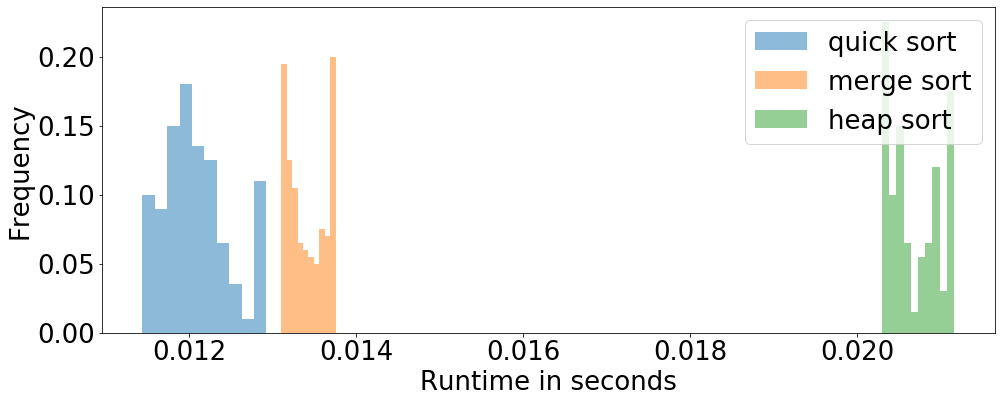

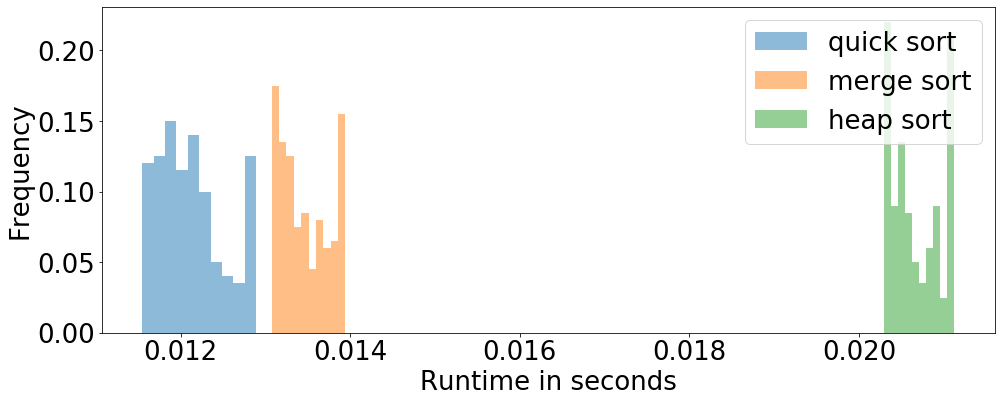

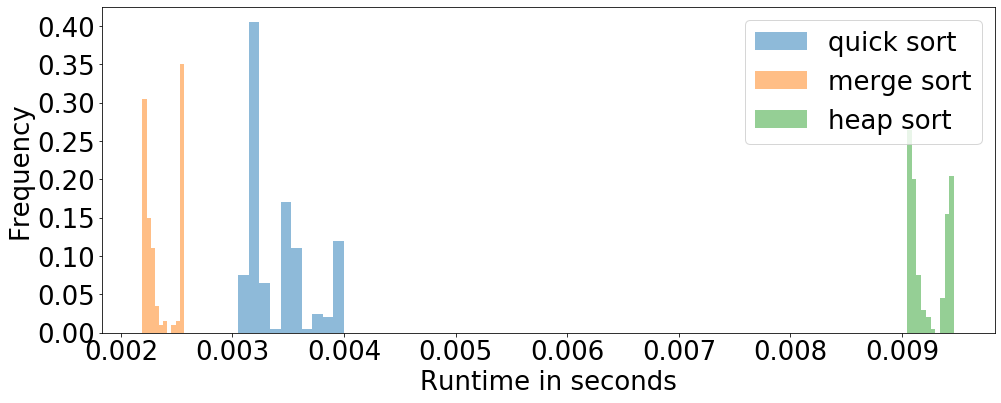

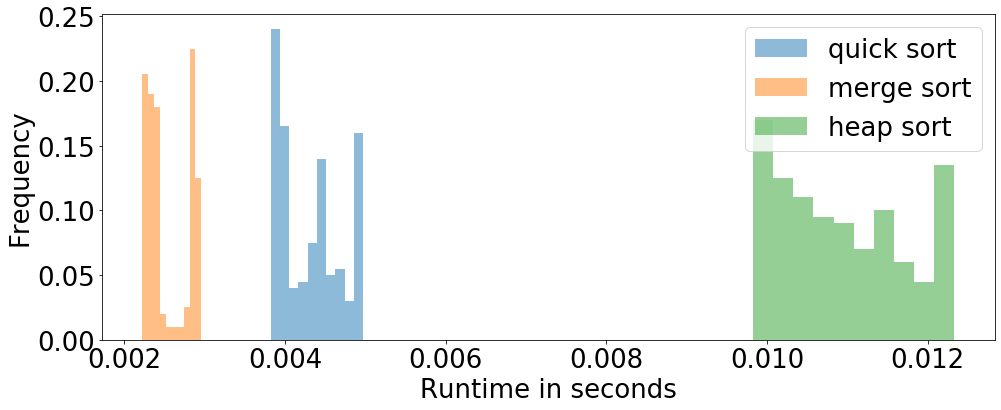

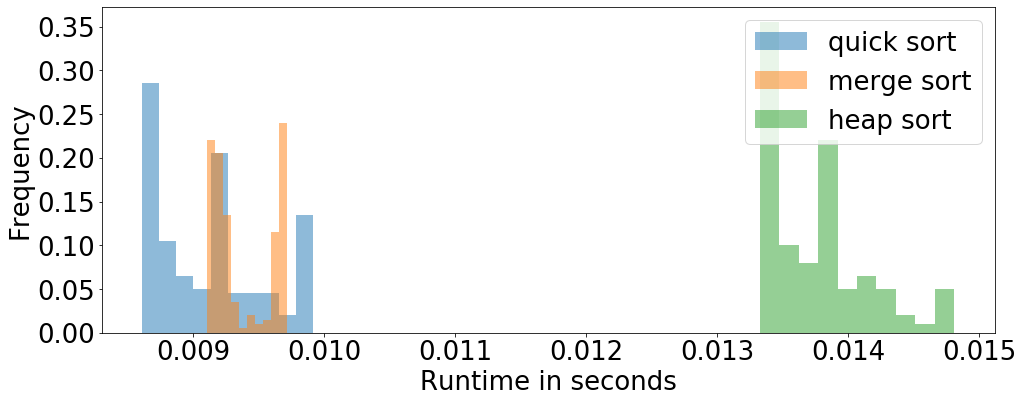

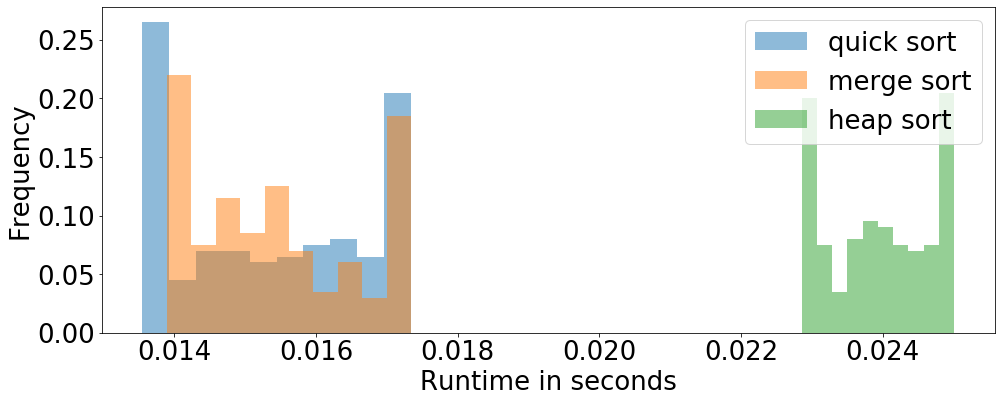

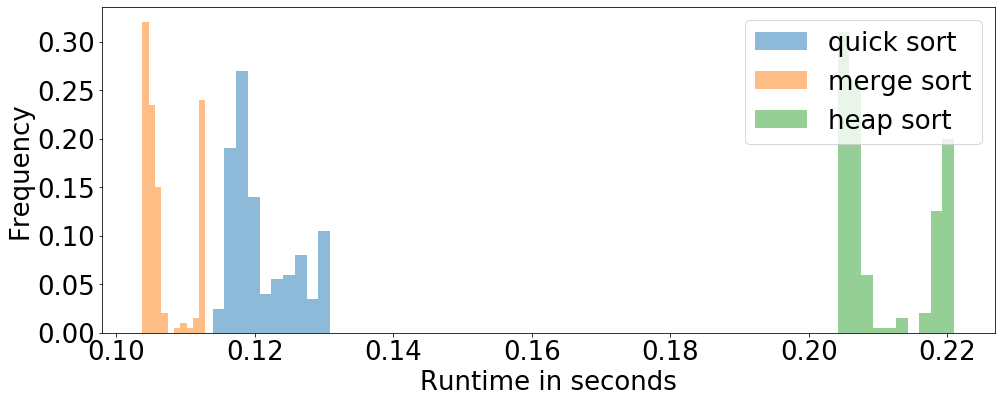

In [55]:
plot_runtimes_together(df_normal, title="Sorting a single column: normal distribution")
plot_runtimes_together(df_uniform, title="Sorting a single column: continious uniform distribution")
plot_runtimes_together(df_uniform_sorted, title="Sorting a single column: continious uniform sorted distribution")
plot_runtimes_together(df_uniform_reverse_sorted, title="Sorting a single column: continious uniform reverse sorted distribution")
plot_runtimes_together(df_uniform_nearly_sorted, title="Sorting a single column: continious uniform nearly sorted distribution")
plot_runtimes_together(df_dates, title="Sorting a single column: dates")
plot_runtimes_together(df_strings, title="Sorting a single column: strings")

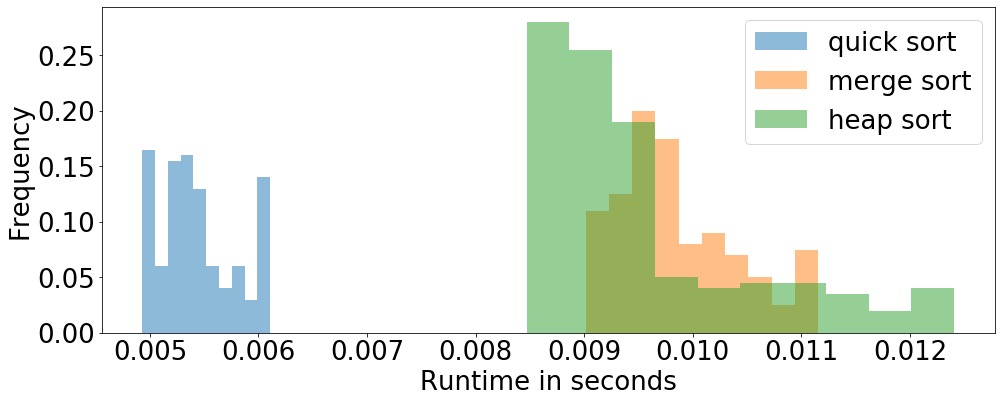

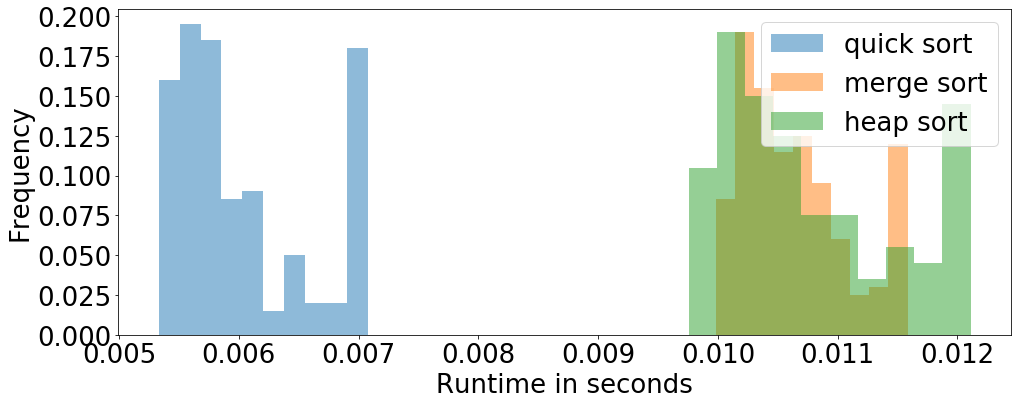

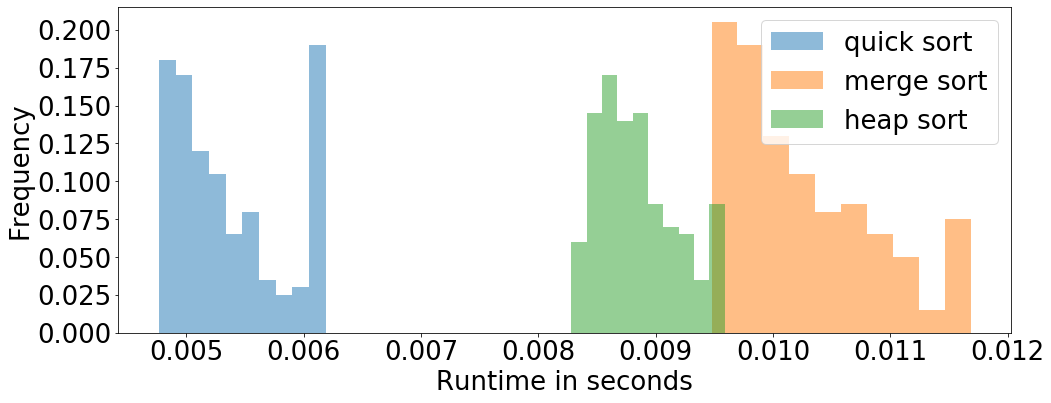

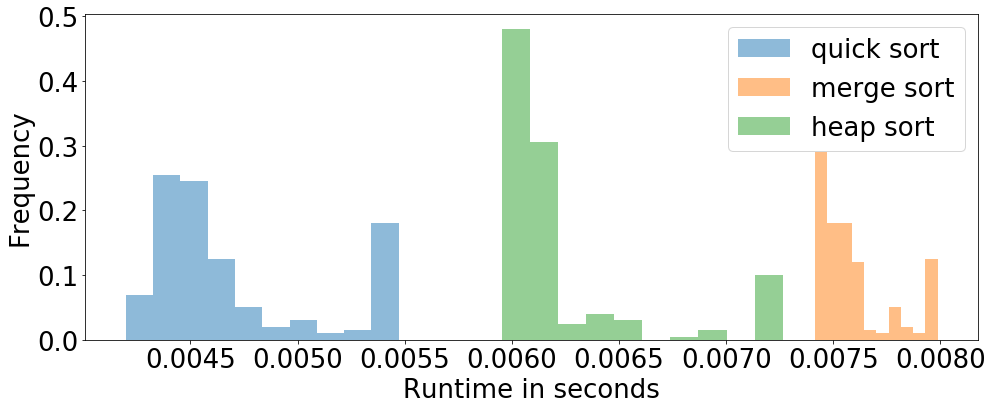

In [56]:
plot_runtimes_together(df_discrete_uniform, title="Sorting a single column: discrete uniform distribution")
plot_runtimes_together(df_discrete_binomial, title="Sorting a single column: binomial distribution")
plot_runtimes_together(df_poisson, title="Sorting a single column: Poisson distribution")
plot_runtimes_together(df_zipf, title="Sorting a single column: Zipf distribution")

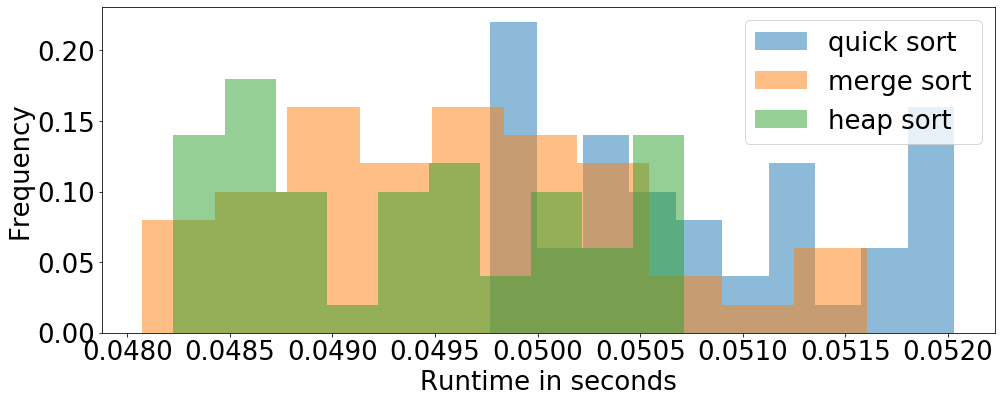

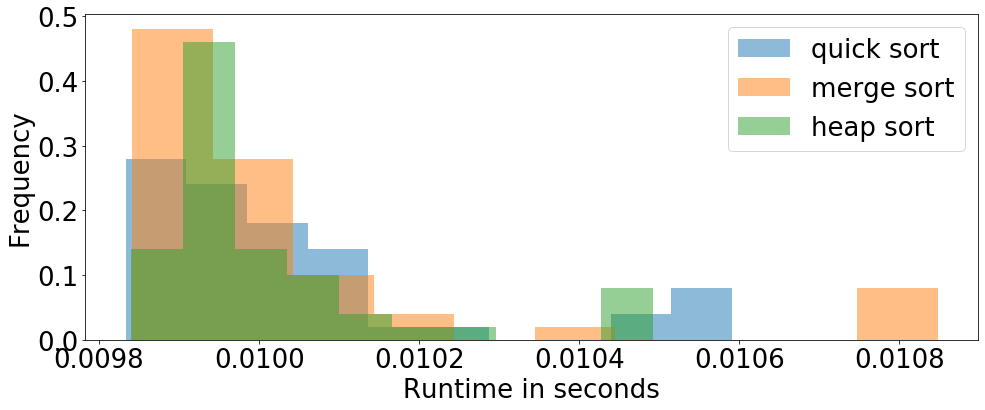

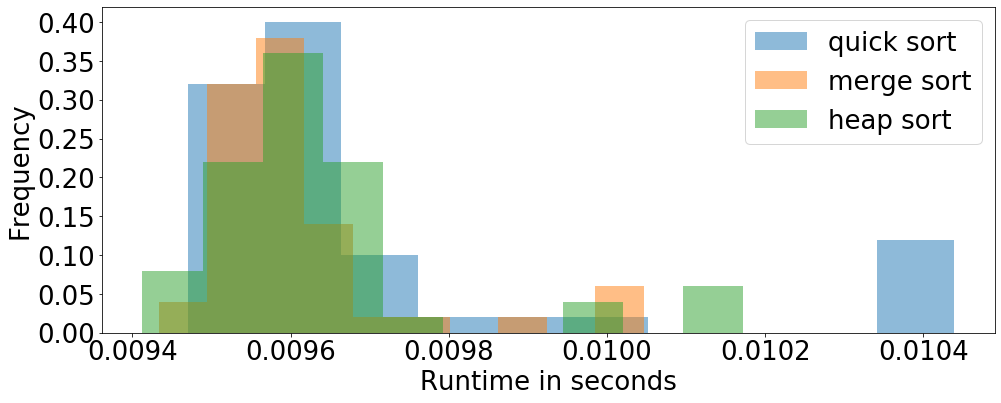

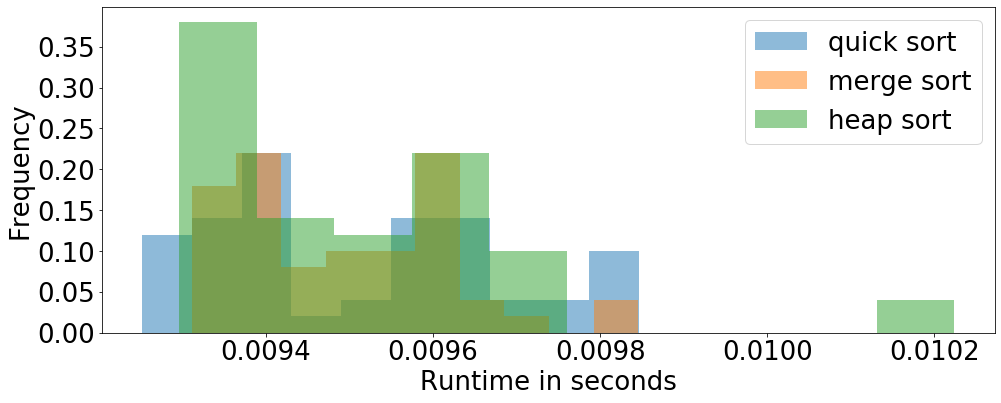

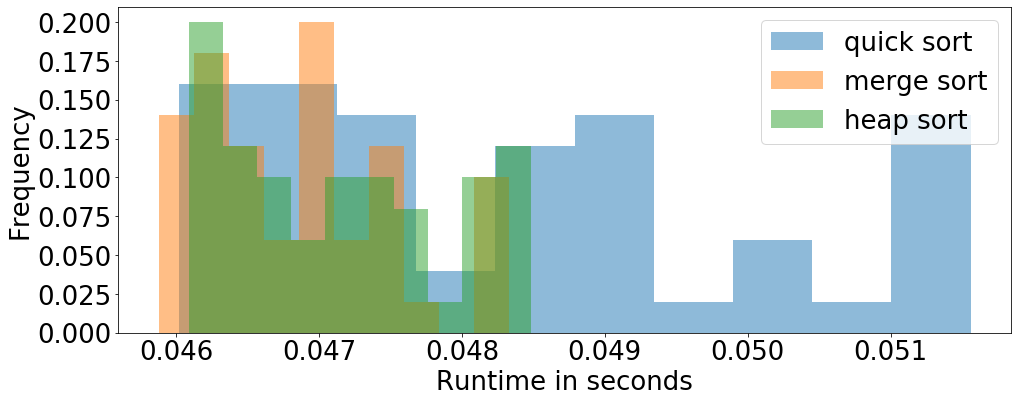

In [45]:
plot_runtimes_together(df_zipf_normal, title="Sorting by two columns: Zipf + normal distribution")
plot_runtimes_together(df_zipf_binomial, title="Sorting by two columns: Zipf + binomial distribution")
plot_runtimes_together(df_zipf_discrete_uniform, title="Sorting by two columns: Zipf + discrete uniform distribution")
plot_runtimes_together(df_zipf_poisson, title="Sorting by two columns: Zipf + Poisson distribution")
plot_runtimes_together(df_zipf_dates, title="Sorting by two columns: Zipf + dates")

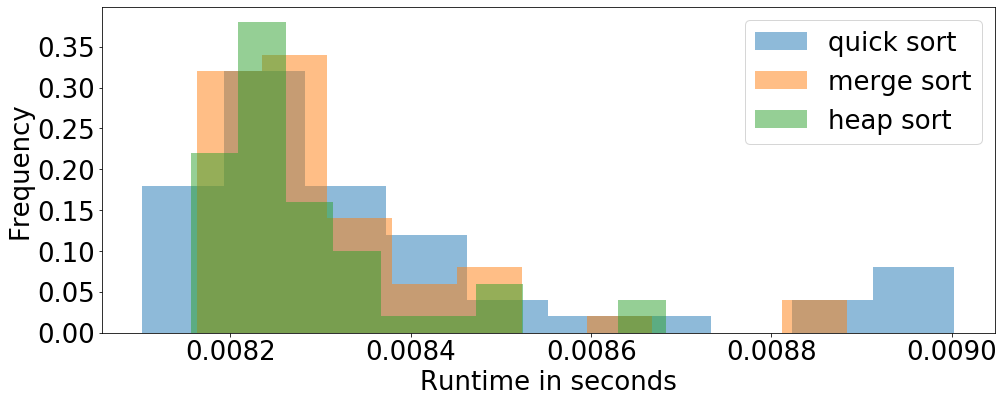

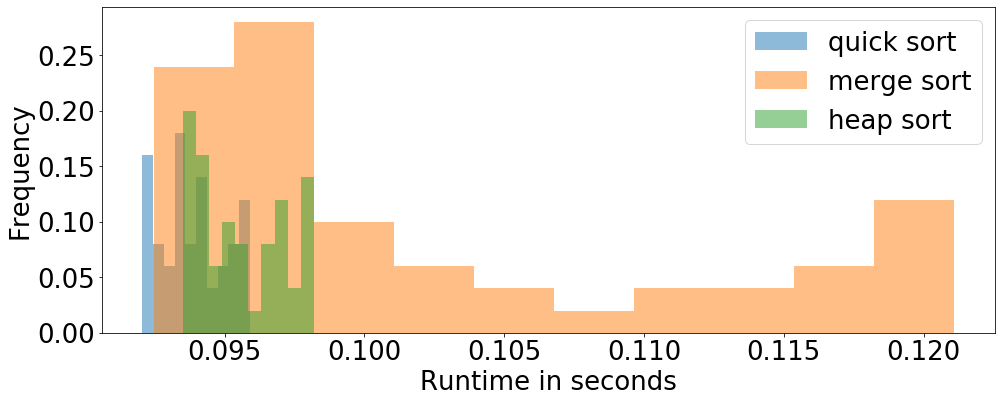

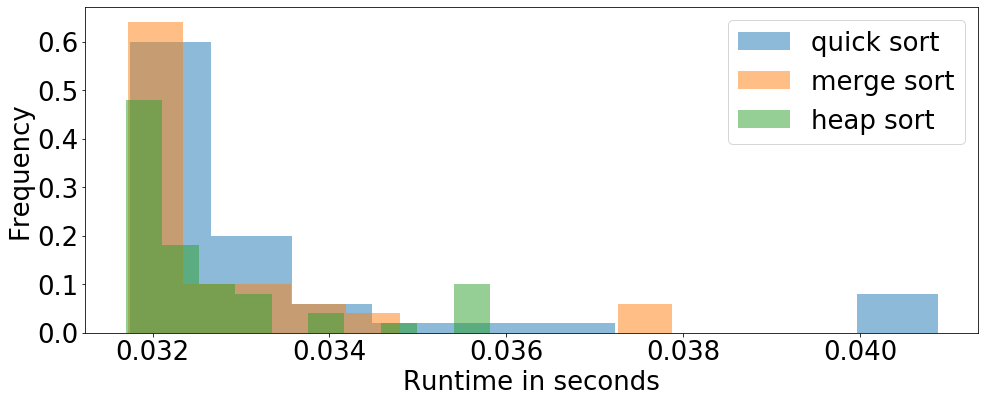

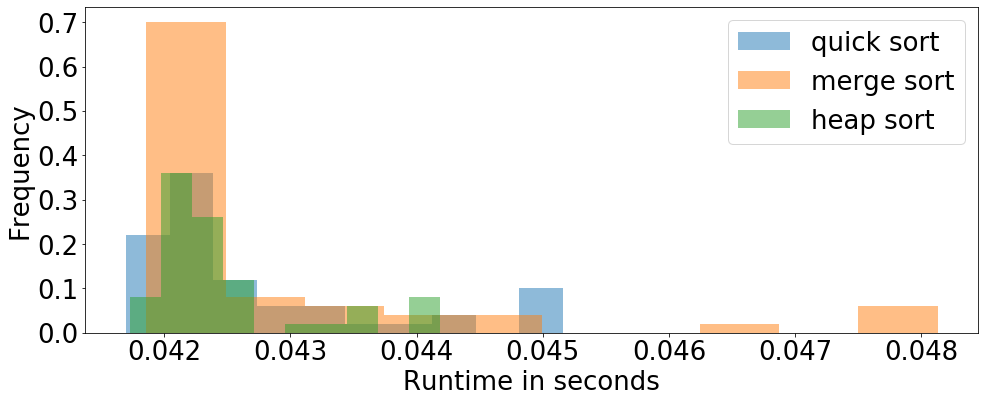

In [46]:
plot_runtimes_together(df_discrete_poisson, title="Sorting by two columns: discrete uniform distribution + Poisson distributon")
plot_runtimes_together(df_discrete_strings, title="Sorting by two columns: discrete uniform distribution + strings")
plot_runtimes_together(df_discrete_uniform_reverse_sorted, title="Sorting by two columns: discrete uniform distribution + reverse sorted uniform distribution")
plot_runtimes_together(df_discrete_uniform_nearly_sorted, title="Sorting by two columns: discrete uniform distribution + nearly sorted uniform distribution")